In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
sns.set()
import warnings
warnings.filterwarnings("ignore")
import pickle

In [2]:
data = pd.read_csv('hotel_bookings_cleaned.csv')

### Feature Selection

In [3]:
corr = data.corr()

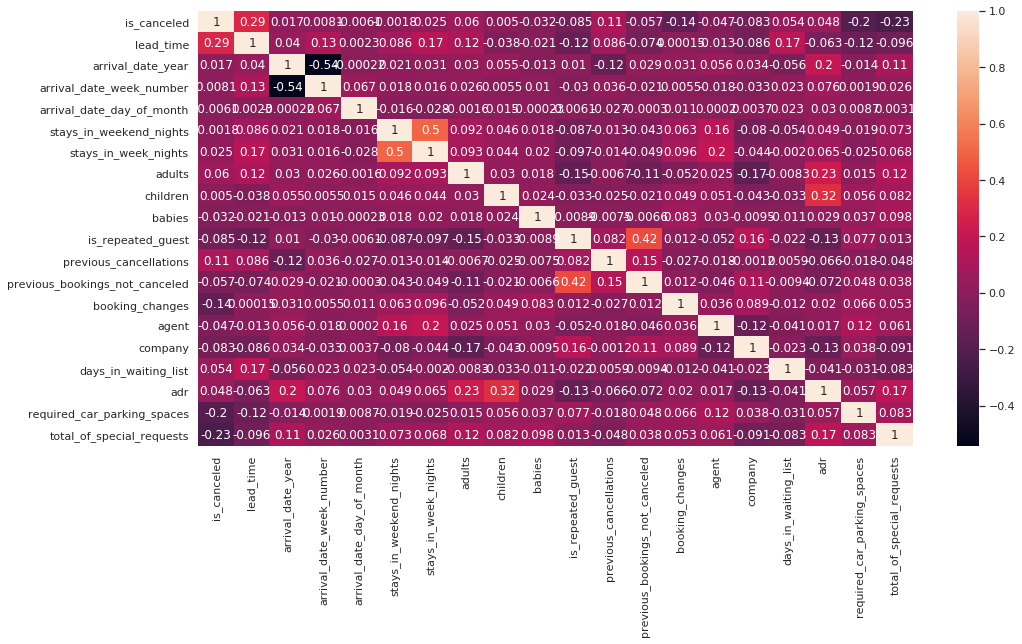

In [4]:
plt.figure(figsize=[16,8])
sns.heatmap(corr, annot=True)
plt.show()

Important features.<br>
1. lead_time
2. previous_cancellations
3. booking_changes
4. required_car_parking
5. total_special_requests

In [5]:
[col for col in data.columns if data[col].dtypes =='O']

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [6]:
numerical = ['lead_time', 'previous_cancellations', 
             'booking_changes', 'required_car_parking_spaces', 'total_of_special_requests']
categorical =['hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type',
              'assigned_room_type', 'deposit_type', 'customer_type']

In [7]:
final_data = data[['is_canceled'] + numerical + categorical]
final_data.head()

,is_canceled,lead_time,previous_cancellations,booking_changes,required_car_parking_spaces,total_of_special_requests,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type
0,0,342,0,3,0,0,Resort Hotel,BB,PRT,Direct,Direct,C,C,No Deposit,Transient
1,0,737,0,4,0,0,Resort Hotel,BB,PRT,Direct,Direct,C,C,No Deposit,Transient
2,0,7,0,0,0,0,Resort Hotel,BB,GBR,Direct,Direct,A,C,No Deposit,Transient
3,0,13,0,0,0,0,Resort Hotel,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient
4,0,14,0,0,0,1,Resort Hotel,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient


### Scaling Data

In [8]:
scaler = MinMaxScaler()

In [9]:
final_data[numerical] = scaler.fit_transform(final_data[numerical])

In [10]:
no_dummies = pd.get_dummies(final_data, drop_first=True)

In [11]:
no_dummies

,is_canceled,lead_time,previous_cancellations,booking_changes,required_car_parking_spaces,total_of_special_requests,hotel_Resort Hotel,meal_FB,meal_HB,meal_SC,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,0.464043,0.0,0.142857,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1.000000,0.0,0.190476,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0.009498,0.0,0.000000,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0.017639,0.0,0.000000,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0.018996,0.0,0.000000,0.0,0.2,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0.031208,0.0,0.000000,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
119386,0,0.138399,0.0,0.000000,0.0,0.4,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
119387,0,0.046133,0.0,0.000000,0.0,0.8,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
119388,0,0.147897,0.0,0.000000,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [12]:
no_dummies.to_csv('Final_data.csv', index=False)

In [15]:
# saving scaler object
pickle.dump(scaler, open('variable_scalers.pkl', 'wb'))